## Swain vs. Alabama 1965 ##

In Swain v. Alabama (1965), a Black defendant, Robert Swain, challenged his conviction on the grounds that the jury selection process was racially biased. Although 26% of eligible men in Talladega County were Black, only 8 out of 100 men on Swain’s jury panel were Black. The goal of this analysis is to use simulation to determine whether such an underrepresentation could reasonably occur by random chance. By simulating many random jury panels based on the county’s demographics, we can assess how unusual Swain’s jury composition was under fair, random selection.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

**Simulation-based hypothesis test**

This code simulates 10,000 random jury panels of 100 men from a population where 26% are Black. It estimates how often a fair, random selection would produce only 8 or fewer Black jurors. The histogram shows the expected distribution, and the p-value measures how unusual Swain’s jury panel was under random selection.

p-value =  0.0


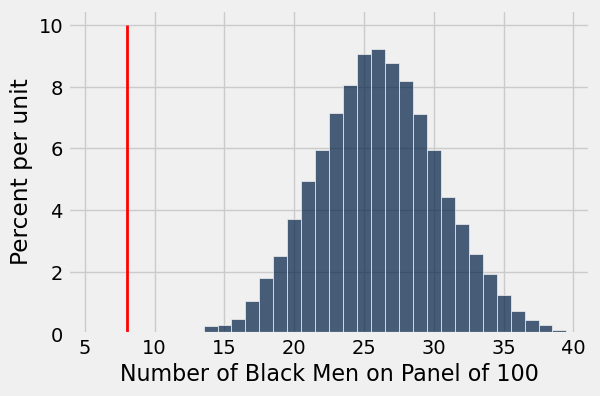

In [4]:
population_proportions = make_array(.26, .74)

def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

panels = make_array()

num_simulations = 10000

for i in np.arange(num_simulations):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)
    
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))
plots.plot([8, 8], [0, .1], color='red', lw=2);
print("p-value = ", sum(panels <= 8)/num_simulations)

**Bootstraping**

This code bootstraps Swain’s observed jury panel (8% Black, 92% white) to estimate the variability of the sample proportion. By repeatedly resampling 10,000 times, we build a bootstrap distribution of possible jury proportions and use it to find a 95% confidence interval for the true population proportion of Black jurors.

In [5]:
sample_panel_proportions = make_array(.08, .92)

def bootstrap_proportion(size, distribution):
    return sample_proportions(size, distribution).item(0)

bootstrap_panels = make_array()

for i in np.arange(num_simulations):
    new_bootstrap_panel = bootstrap_proportion(100, sample_panel_proportions) * 100
    bootstrap_panels = np.append(bootstrap_panels, new_bootstrap_panel)

In [6]:
left = percentile(2.5, bootstrap_panels)
right = percentile(97.5, bootstrap_panels)
left, right

(3.0, 14.000000000000002)

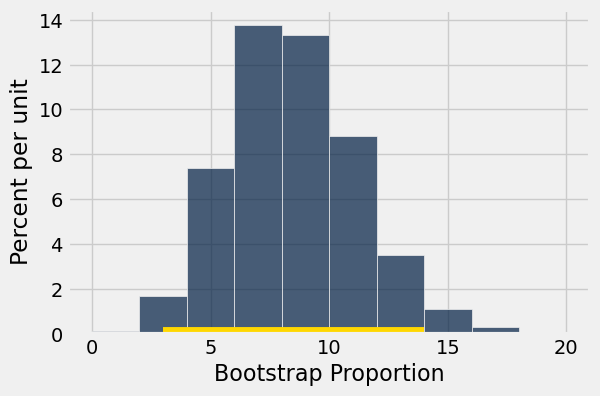

In [10]:
Table().with_columns('Bootstrap Proportion', bootstrap_panels).hist()
plots.plot([left, right],[0, 0], color = 'gold', lw = 10);



The visualization below compares two simulated distributions:

- The blue histogram represents the bootstrap distribution based on Swain’s observed jury panel (about 8% Black jurors). It shows the range of proportions you might expect if 8% were truly the underlying population rate.
- The yellow histogram shows the null distribution—what we’d expect if jurors were selected randomly from a population that is 26% Black.
- The red line marks the true county rate (26%), and the small red dot near 8 marks Swain’s observed proportion.

The large separation between the two distributions shows that Swain’s panel (8%) is far lower than expected under random selection, suggesting strong evidence that the jury selection process was not representative of the county’s demographics.

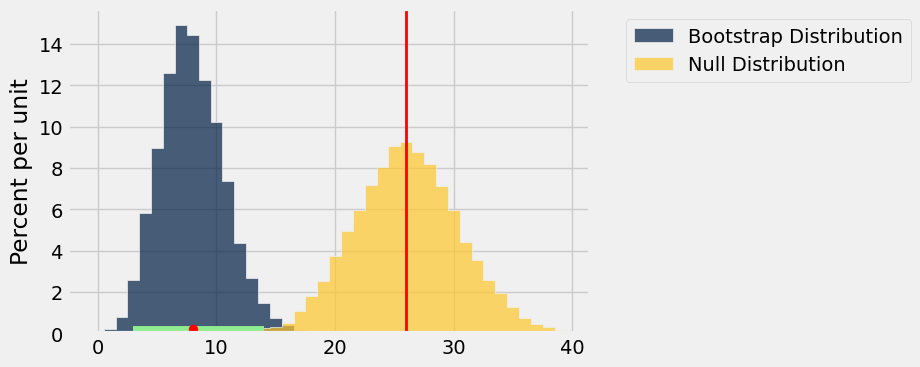

In [8]:
Table().with_columns(
    'Bootstrap Distribution', bootstrap_panels,
    'Null Distribution', panels
).hist(bins=np.arange(-0.5,40.))

plots.plot(
    [left,right], 
    [0,0], 
    color="lightgreen", 
    lw=10, 
    zorder=1
);
plots.scatter(
    sample_panel_proportions.item(0)*100,
    0.002,
    color="red",
    s=40,
    zorder=2);

plots.axvline(population_proportions.item(0)*100, color='red', lw=2);



**Conclusion** 

The simulation shows that if jury selection were fair, panels would rarely include as few as 8 Black men out of 100. The observed result falls far below what we’d expect by random chance, providing strong evidence that the selection process in Swain v. Alabama (1965) was not representative of the county’s population and likely biased against Black jurors.